<a href="https://colab.research.google.com/github/Nicolasudry/SAT-Python/blob/main/TP_SAT_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import folium
from collections import defaultdict

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Leemos dataset
df = pd.read_csv ('/content/drive/MyDrive/Sat python/student_depression_dataset.csv')

print (df.head())

   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

        Sleep Duration Dietary Habits   Degree  \
0          '5-6 hours'        Healthy  B.Pharm   
1          '5-6 hours'       Moderate      BSc   
2  'Less than 5 hours'        Healthy       BA   
3     

In [5]:
#Vemos nombre columnas

print(df.columns)

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')


In [6]:
#Vemos tipo de dato
print(df.dtypes)

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                          object
Family History of Mental Illness          object
Depression                                 int64
dtype: object


In [7]:
#Checkeamos NA
print(df.isnull().sum())

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [8]:
#Hacemos una lista de las variables numericas
columnasnumericas=['Age','Academic Pressure','Work Pressure','CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours','Depression']

In [9]:
#Hacemos una lista de las variables categoricas
columnascategoricas=['Gender','City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?','Financial Stress', 'Family History of Mental Illness']

In [10]:

def obtener_variables_numericas(df):
    return df.select_dtypes(include=['number']).columns.tolist()

In [11]:
#Analizamos outliers
outliers_dict={}
for col in columnasnumericas:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  outliercount = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
  outliers_dict[col]=outliercount
print('Cantidad de Outliers por variable:')
for col,count in outliers_dict.items():
  print(f'{col}: {count}')

Cantidad de Outliers por variable:
Age: 12
Academic Pressure: 0
Work Pressure: 3
CGPA: 9
Study Satisfaction: 0
Job Satisfaction: 8
Work/Study Hours: 0
Depression: 0


In [12]:
outliers_dict = {}

for col in columnasnumericas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    outliers_dict[col] = outliers[col]

# Imprimir la cantidad y los valores de outliers por variable
for col, outlier_values in outliers_dict.items():
    print(f"Outliers en {col}:")
    print(outlier_values)
    print(f"Cantidad de outliers en {col}: {len(outlier_values)}")
    print()

Outliers en Age:
2909     58.0
3436     49.0
4386     51.0
5537     44.0
9006     46.0
9238     59.0
13499    54.0
13618    48.0
14819    56.0
18766    46.0
25202    48.0
27334    48.0
Name: Age, dtype: float64
Cantidad de outliers en Age: 12

Outliers en Academic Pressure:
Series([], Name: Academic Pressure, dtype: float64)
Cantidad de outliers en Academic Pressure: 0

Outliers en Work Pressure:
4365     5.0
14855    2.0
25746    5.0
Name: Work Pressure, dtype: float64
Cantidad de outliers en Work Pressure: 3

Outliers en CGPA:
4365     0.0
10407    0.0
11489    0.0
13909    0.0
14855    0.0
20913    0.0
21805    0.0
25746    0.0
26719    0.0
Name: CGPA, dtype: float64
Cantidad de outliers en CGPA: 9

Outliers en Study Satisfaction:
Series([], Name: Study Satisfaction, dtype: float64)
Cantidad de outliers en Study Satisfaction: 0

Outliers en Job Satisfaction:
292      3.0
4365     4.0
13909    2.0
14855    1.0
20913    1.0
23141    2.0
25746    4.0
26719    2.0
Name: Job Satisfaction

<Axes: ylabel='count'>

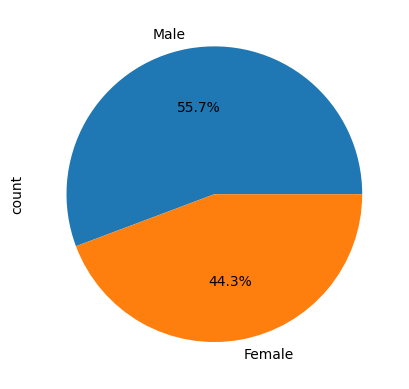

In [13]:
# Gráfico de pastel (Distribucion de genero). El genero esta relacionado con la depresion? Por eso este grafico.
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='count'>

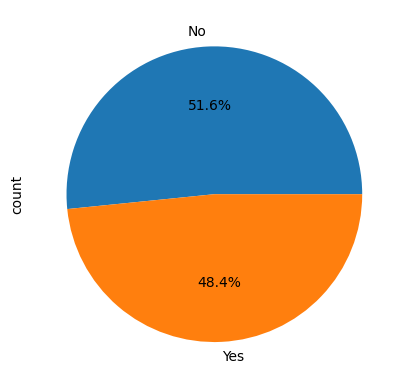

In [14]:
# Gráfico de pastel
df['Family History of Mental Illness'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='count'>

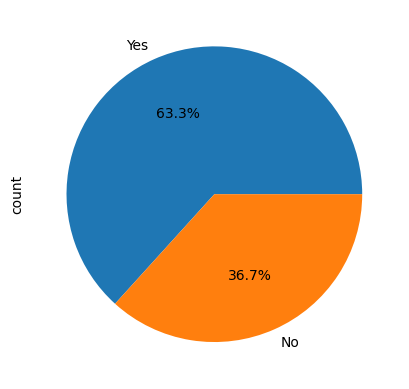

In [15]:
# Gráfico de pastel
df['Have you ever had suicidal thoughts ?'].value_counts().plot.pie(autopct='%1.1f%%')


<Axes: ylabel='count'>

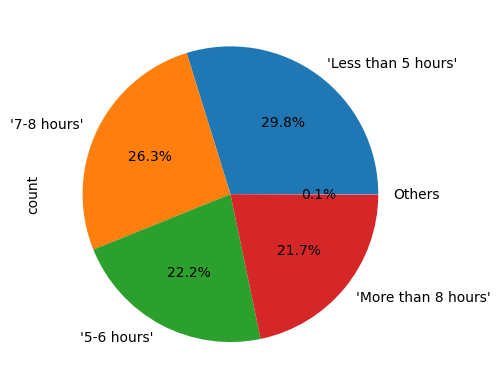

In [16]:
# Gráfico de pastel evaluar si horas de sueño afectabn en la depresion
df['Sleep Duration'].value_counts().plot.pie(autopct='%1.1f%%')

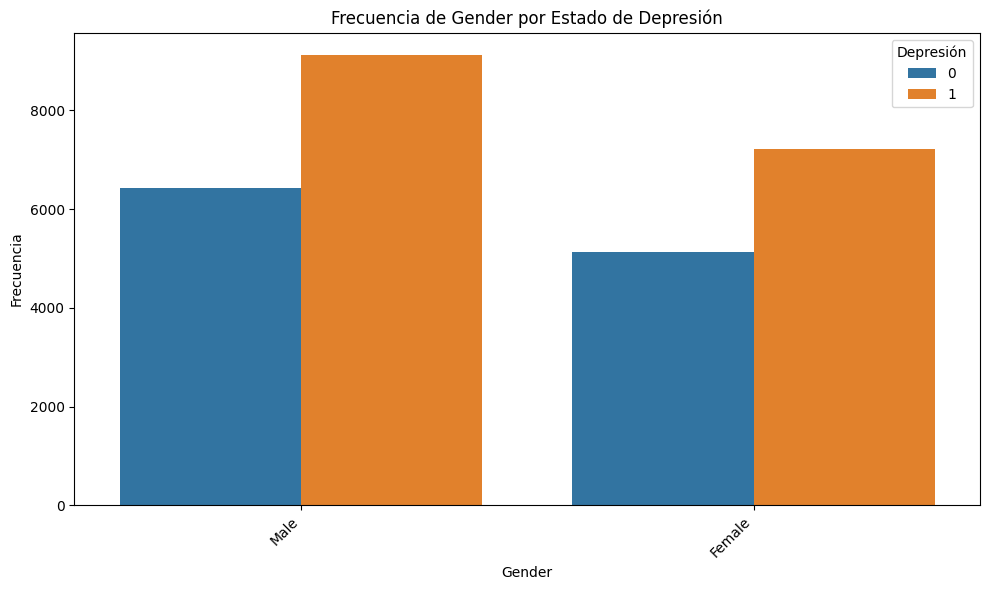

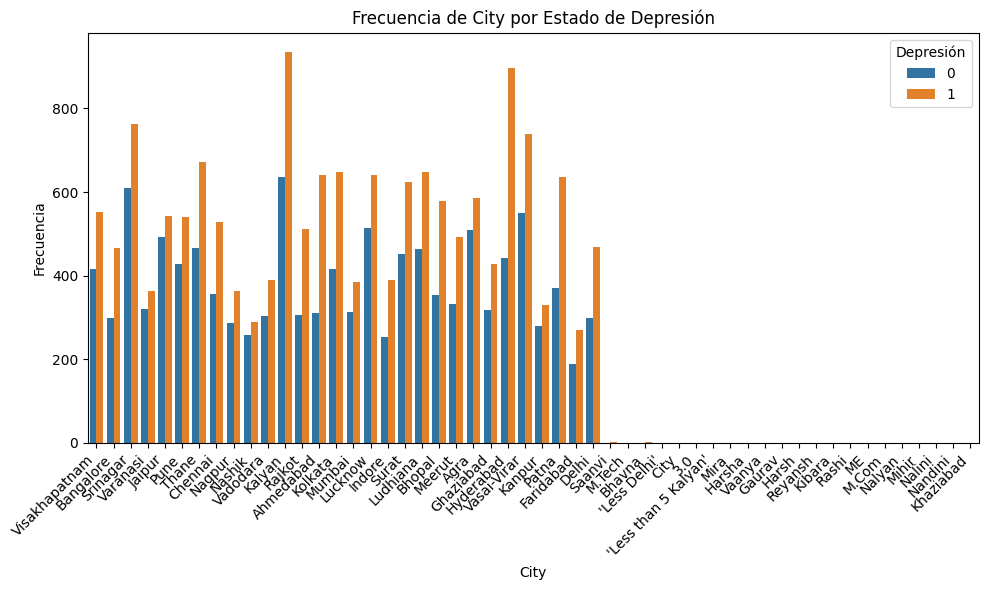

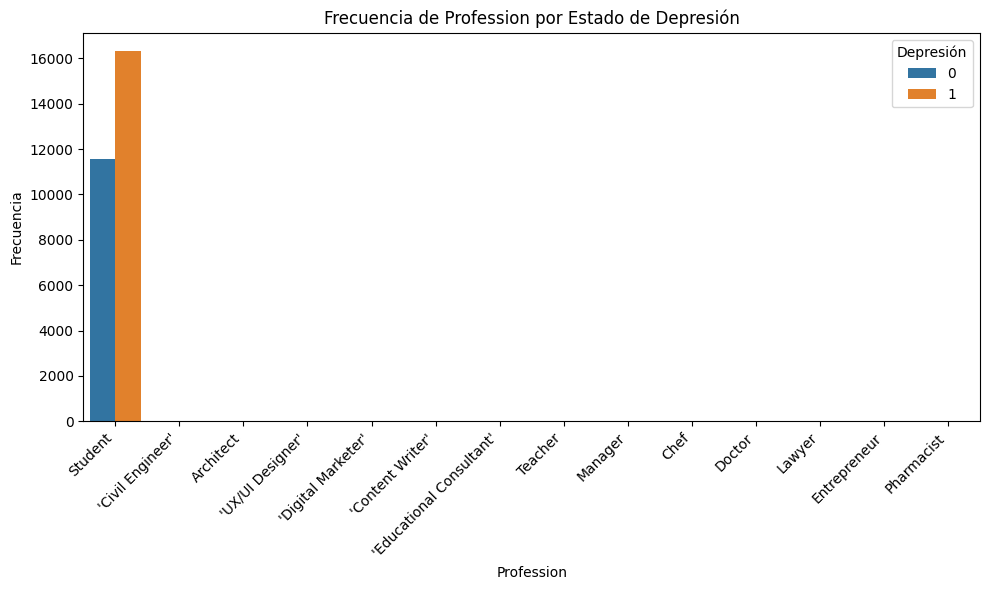

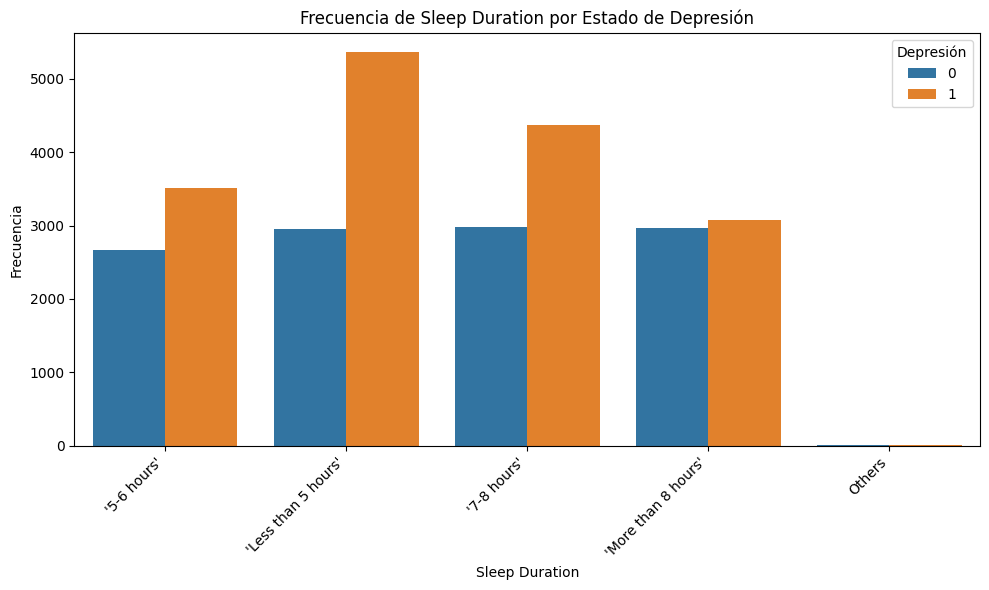

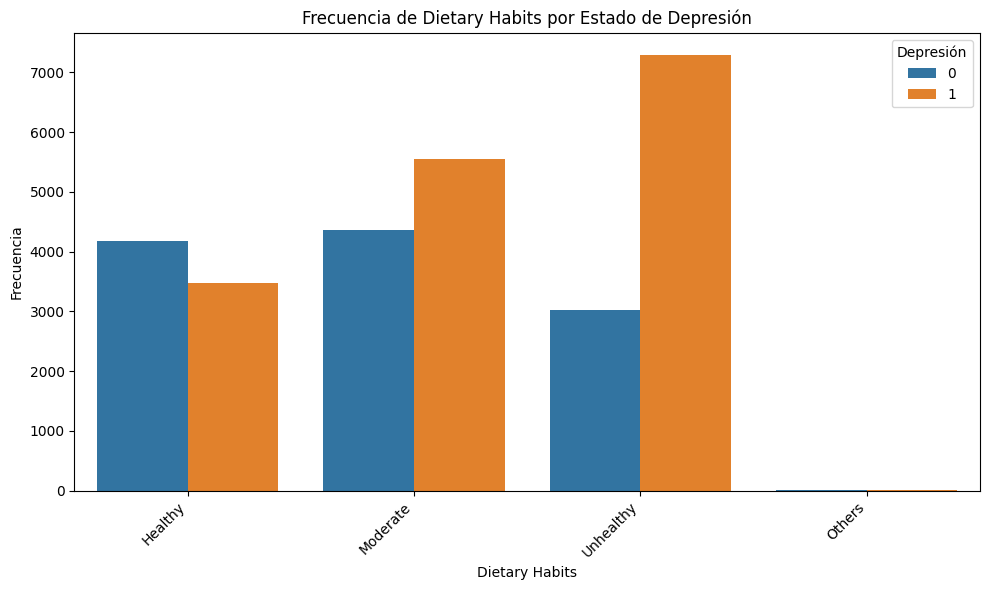

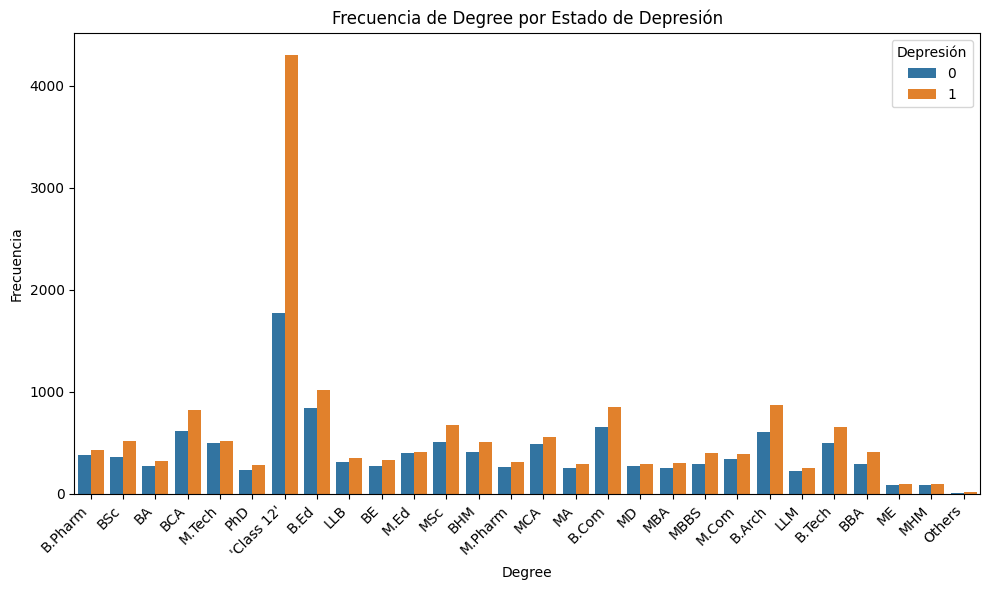

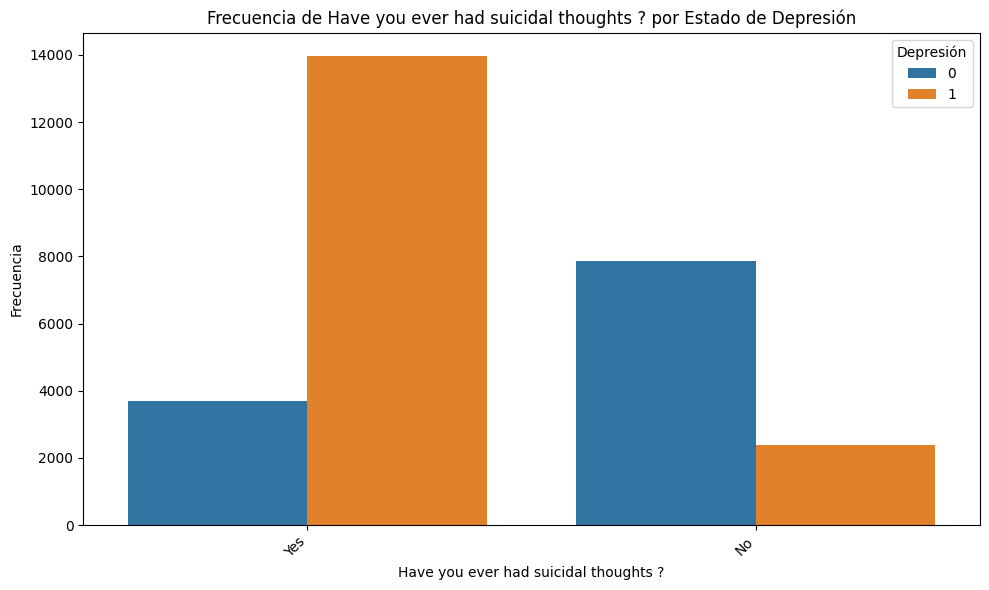

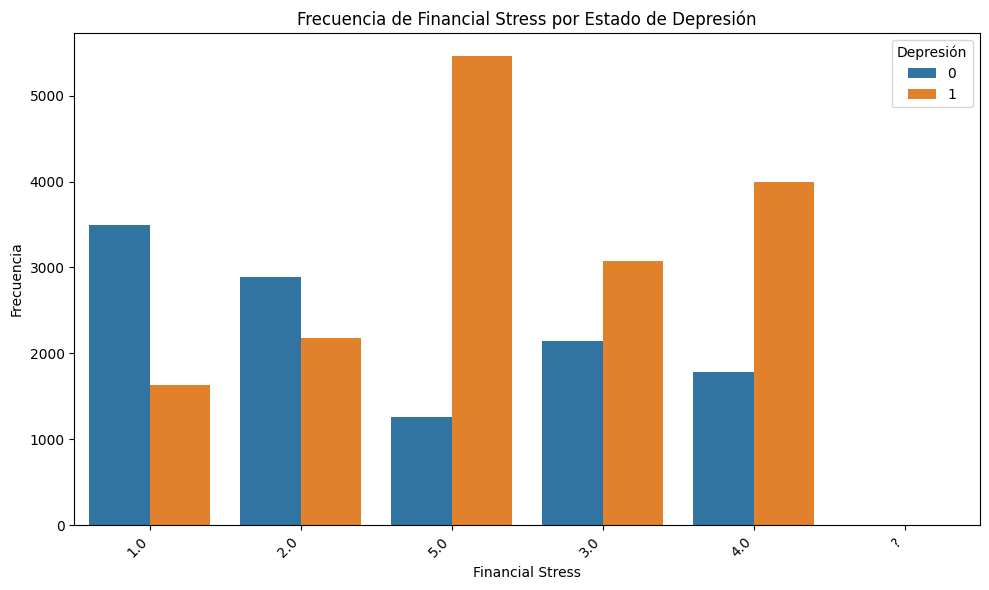

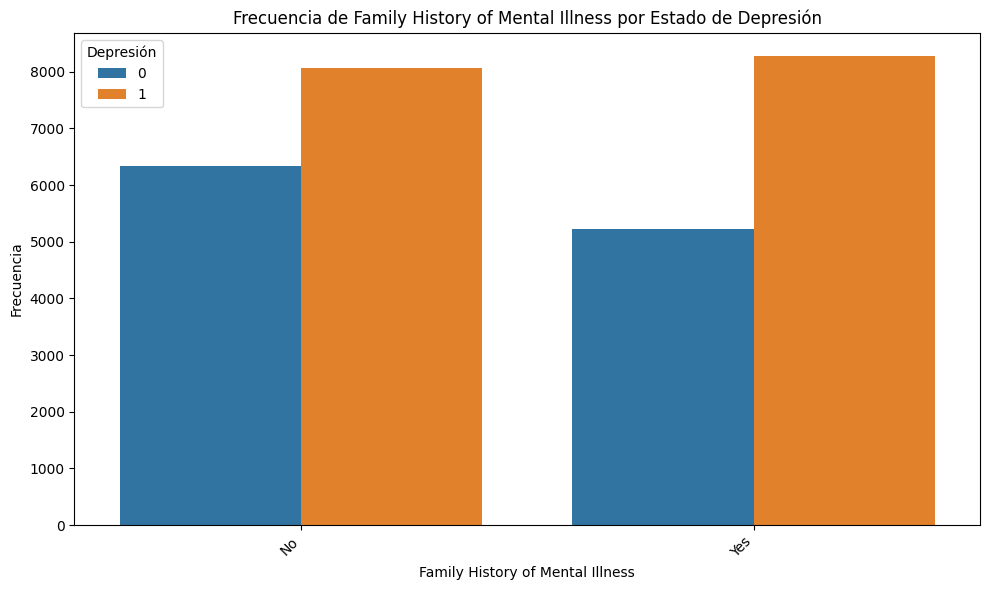

In [17]:
# Visualización de la frecuencia de variables categóricas
for col in columnascategoricas:
    plt.figure(figsize=(10, 6))  # Aumentamos el tamaño para mejor visualización
    sns.countplot(data=df, x=col, hue='Depression')
    plt.title(f'Frecuencia de {col} por Estado de Depresión')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Depresión')  # Añadimos leyenda para identificar las barras
    plt.tight_layout()
    plt.show()



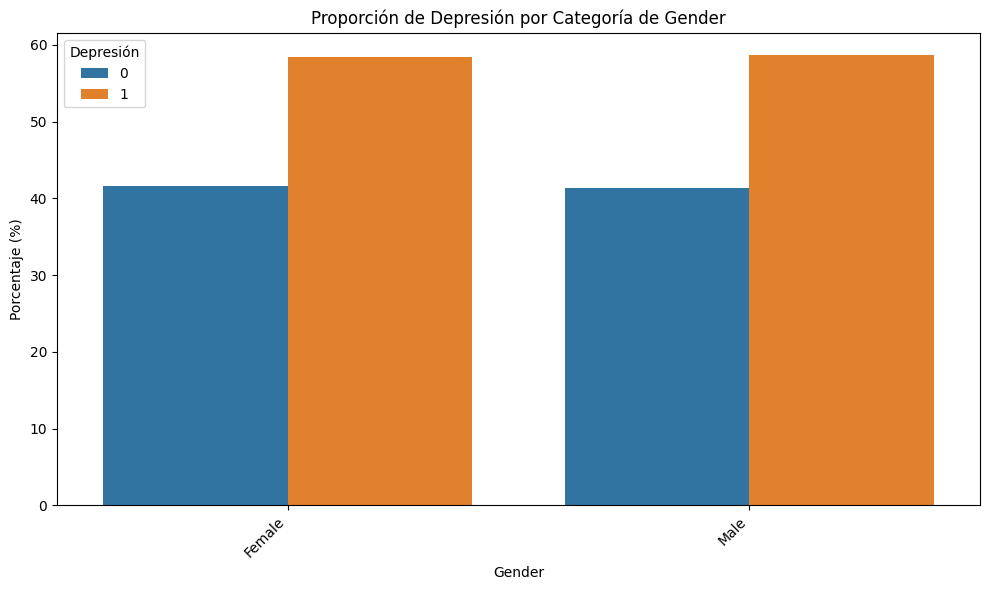

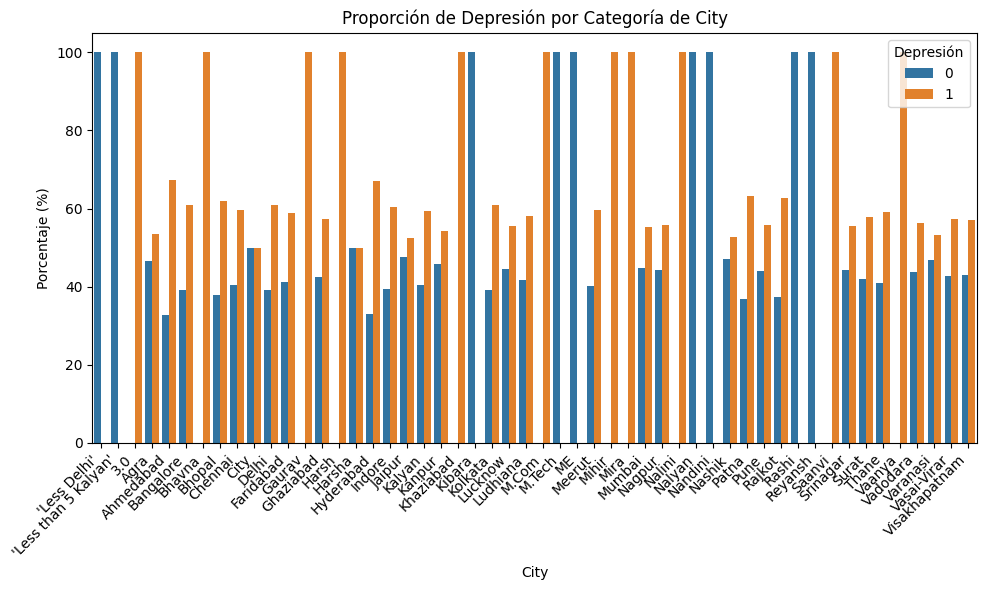

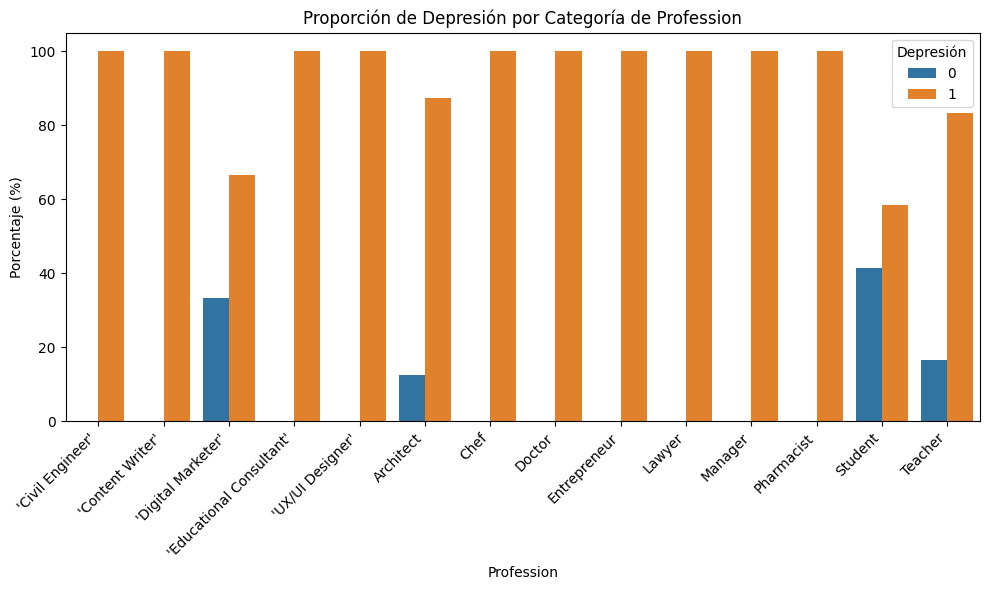

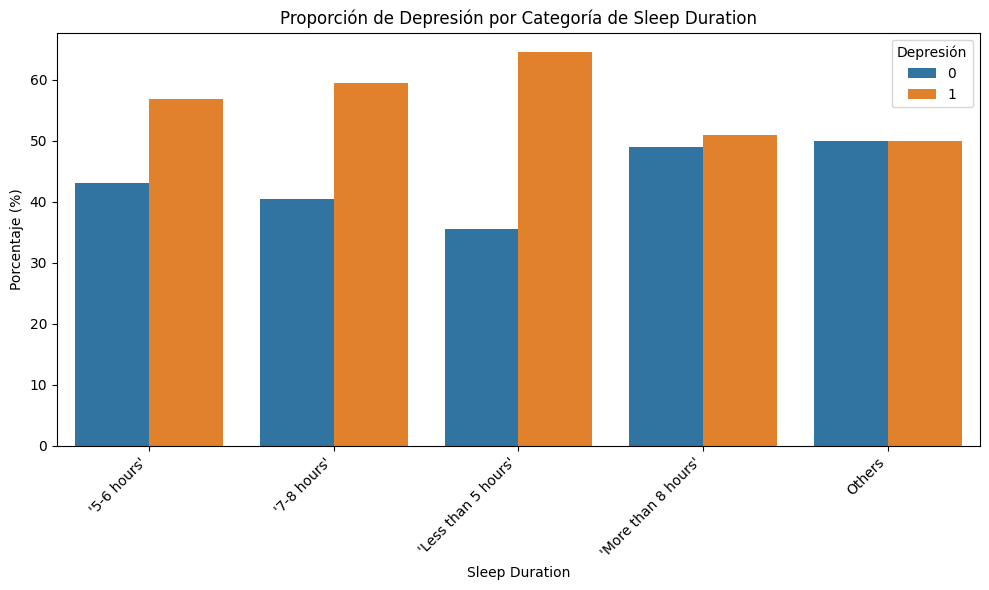

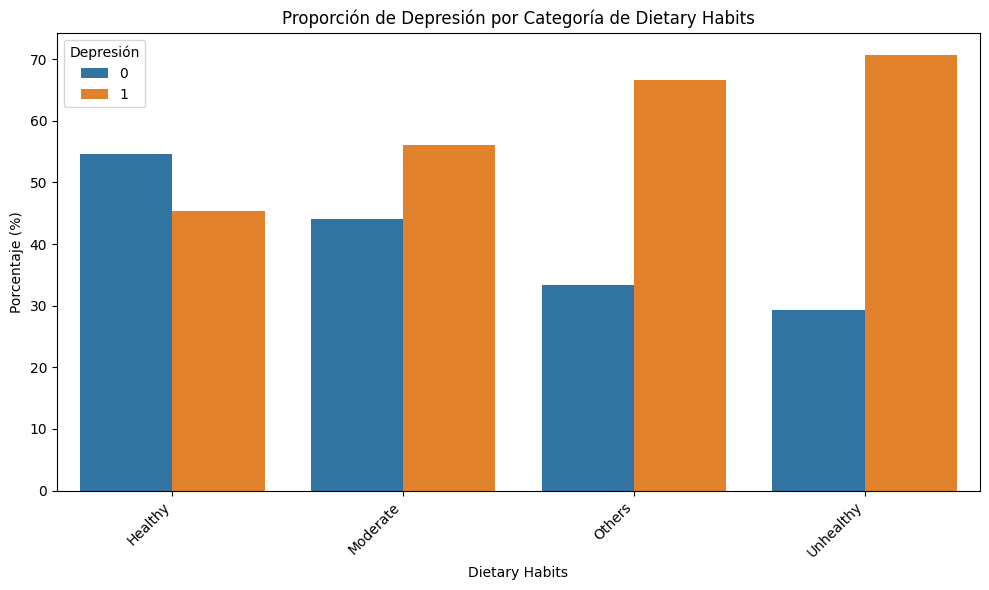

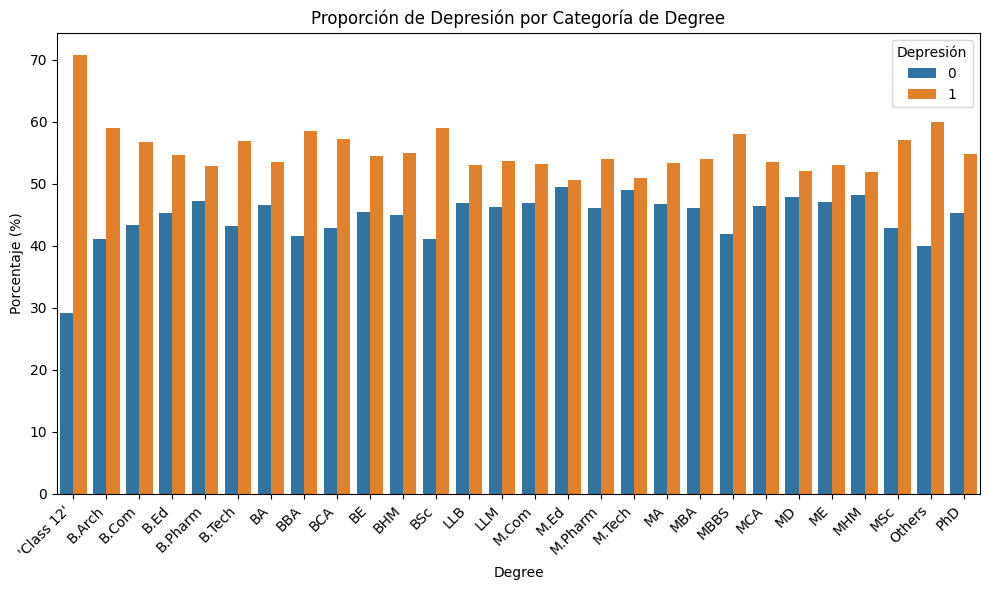

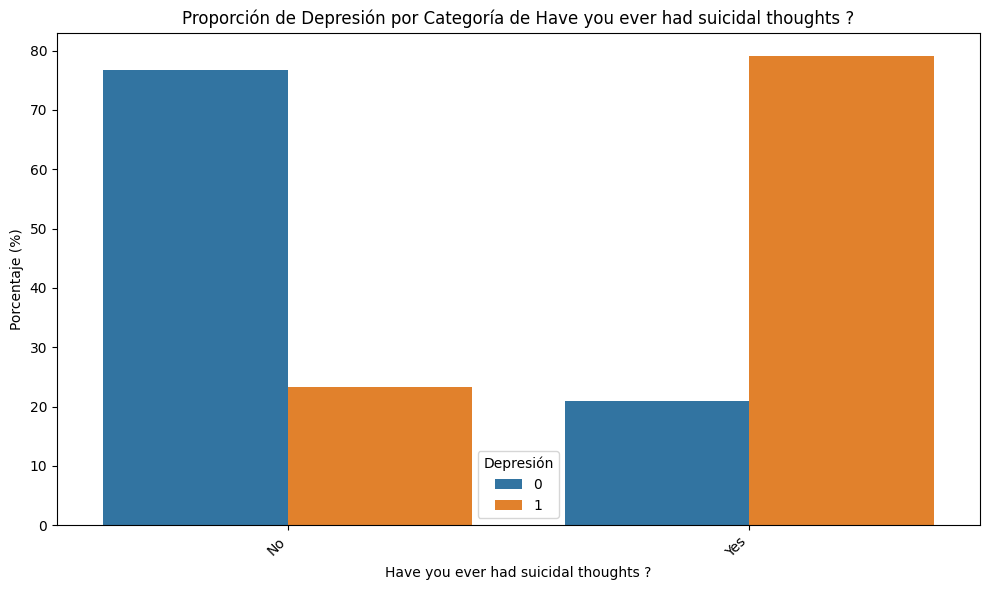

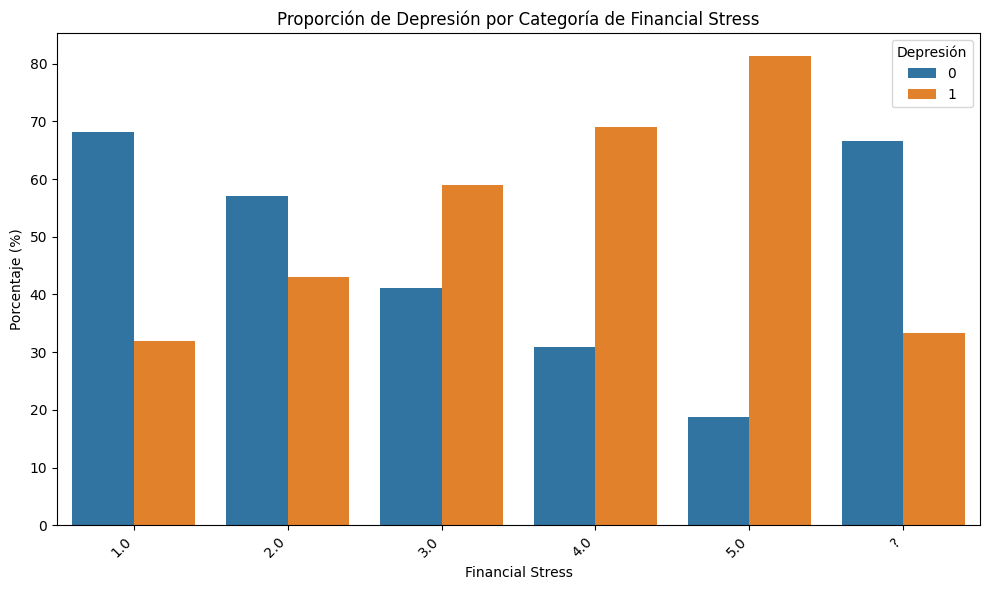

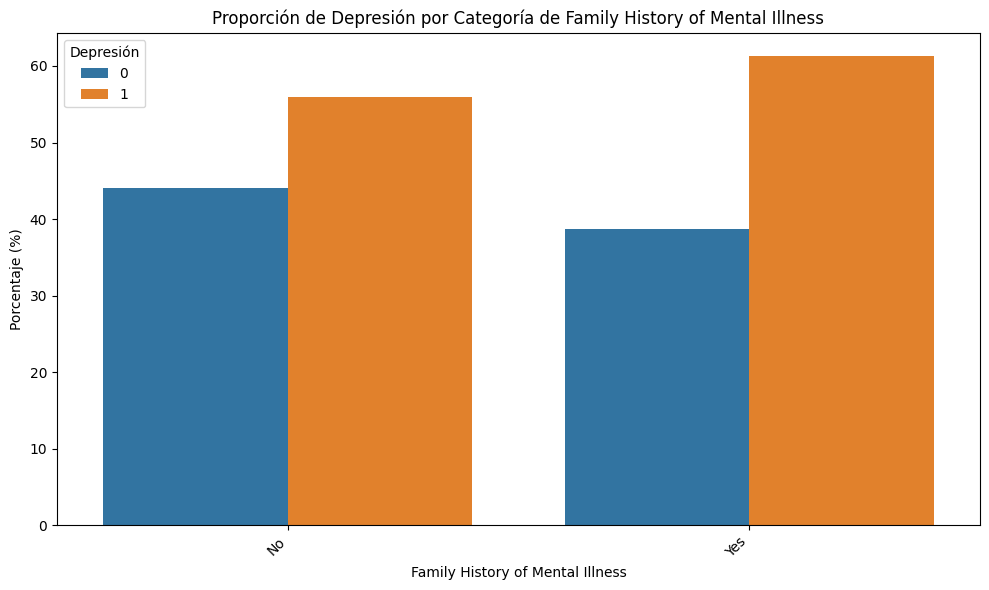

In [18]:
for col in columnascategoricas:
    # Calcula la frecuencia relativa de 'Depression' por cada categoría de 'col'
    depresion_por_categoria = df.groupby(col)['Depression'].value_counts(normalize=True).mul(100).rename('Porcentaje').reset_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(data=depresion_por_categoria, x=col, y='Porcentaje', hue='Depression')
    plt.title(f'Proporción de Depresión por Categoría de {col}')
    plt.ylabel('Porcentaje (%)')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Depresión')
    plt.tight_layout()
    plt.show()

In [19]:
# Para ver de dónde son los casos que estamos analizando y con que tanta cantidad de estudiantes con depresión hay

# 1. Agrupar la cantidad de casos de depresión por ciudad
depresion_por_ciudad = df[df['Depression'] == 1]['City'].value_counts().reset_index()
depresion_por_ciudad.columns = ['City', 'Num_Depressed']

# 2. Obtener las coordenadas de las ciudades
geolocator = Nominatim(user_agent="depression_by_city_map")
city_coordinates = defaultdict(lambda: [None, None])

for city in depresion_por_ciudad['City']:
    try:
        location = geolocator.geocode(city)
        if location:
            city_coordinates[city] = [location.latitude, location.longitude]
        else:
            print(f"No se encontraron coordenadas para: {city}")
    except Exception as e:
        print(f"Error al geocodificar {city}: {e}")

# 3. Crear el mapa centrado en la ubicación promedio de las ciudades con depresión
valid_coords = [coord for coord in city_coordinates.values() if coord[0] is not None]
if valid_coords:
    avg_lat = np.mean([coord[0] for coord in valid_coords])
    avg_lon = np.mean([coord[1] for coord in valid_coords])
else:
    avg_lat = -34.6037  # Coordenadas por defecto si no se encuentran ciudades válidas
    avg_lon = -58.3816
    print("No se encontraron coordenadas válidas para ninguna ciudad. Centrando el mapa en una ubicación por defecto.")

map_depresion_por_ciudad = folium.Map(location=[avg_lat, avg_lon], tiles='OpenStreetMap', zoom_start=5)

# 4. Graficar los casos de depresión por ciudad con un radio proporcional al número de casos
max_cases = depresion_por_ciudad['Num_Depressed'].max()
if max_cases > 0:
    for index, row in depresion_por_ciudad.iterrows():
        city = row['City']
        num_depressed = row['Num_Depressed']
        coords = city_coordinates[city]
        if coords[0] is not None and coords[1] is not None:
            # Escalar el radio para que sea visualmente proporcional
            radius = (num_depressed / max_cases) * 20  # Ajusta el factor de escala (20) según necesites
            folium.CircleMarker(
                location=coords,
                radius=radius,
                color="#eb2d2d",
                stroke=False,
                fill=True,
                fill_opacity=0.6,
                popup=f"Ciudad: {city}\nCasos de Depresión: {num_depressed}",
                fill_color='#eb2d2d'
            ).add_to(map_depresion_por_ciudad)
else:
    print("No se encontraron casos de depresión en el dataset.")

# Mostrar el mapa
map_depresion_por_ciudad

Error al geocodificar Hyderabad: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Hyderabad&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


Error al geocodificar Ludhiana: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Ludhiana&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


Error al geocodificar Surat: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Surat&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


Error al geocodificar Agra: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Agra&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


Error al geocodificar Pune: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Pune&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


Error al geocodificar Chennai: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Chennai&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


Error al geocodificar Delhi: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Delhi&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


Error al geocodificar Vadodara: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Vadodara&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


Error al geocodificar Mumbai: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Mumbai&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


Error al geocodificar Mira: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Mira&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


Error al geocodificar Harsh: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Harsh&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


No se encontraron coordenadas para: Khaziabad


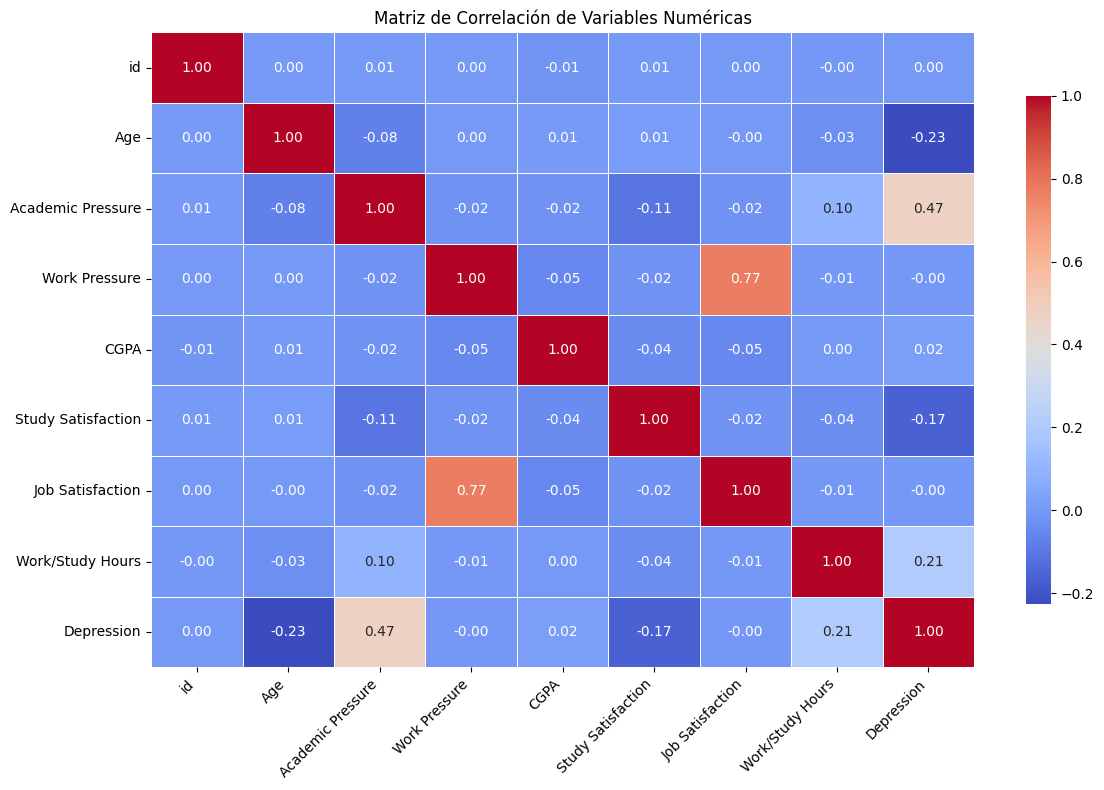

In [20]:

# Calcular la matriz de correlación para las columnas numéricas
# El argumento numeric_only=True asegura que solo se consideren las columnas numéricas
corr_matrix = df.corr(numeric_only=True)

# Crear el heatmap
plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura para mejor visualización
sns.heatmap(
    corr_matrix,
    annot=True,         # Mostrar los valores de correlación en las celdas
    fmt='.2f',         # Formatear los valores a dos decimales
    cmap='coolwarm',     # Usar el mapa de colores 'coolwarm' (rojo para positivo, azul para negativo)
    annot_kws={"size": 10}, # Ajustar el tamaño de la fuente de las anotaciones
    linewidths=.5,      # Agregar líneas entre las celdas para mejor separación
    cbar_kws={'shrink': .8} # Reducir un poco el tamaño de la barra de colores
)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.xticks(rotation=45, ha='right') # Rotar las etiquetas del eje x para mejor legibilidad
plt.yticks(rotation=0)        # Asegurar que las etiquetas del eje y no estén rotadas
plt.tight_layout()          # Ajustar el diseño para evitar recortes
plt.show()

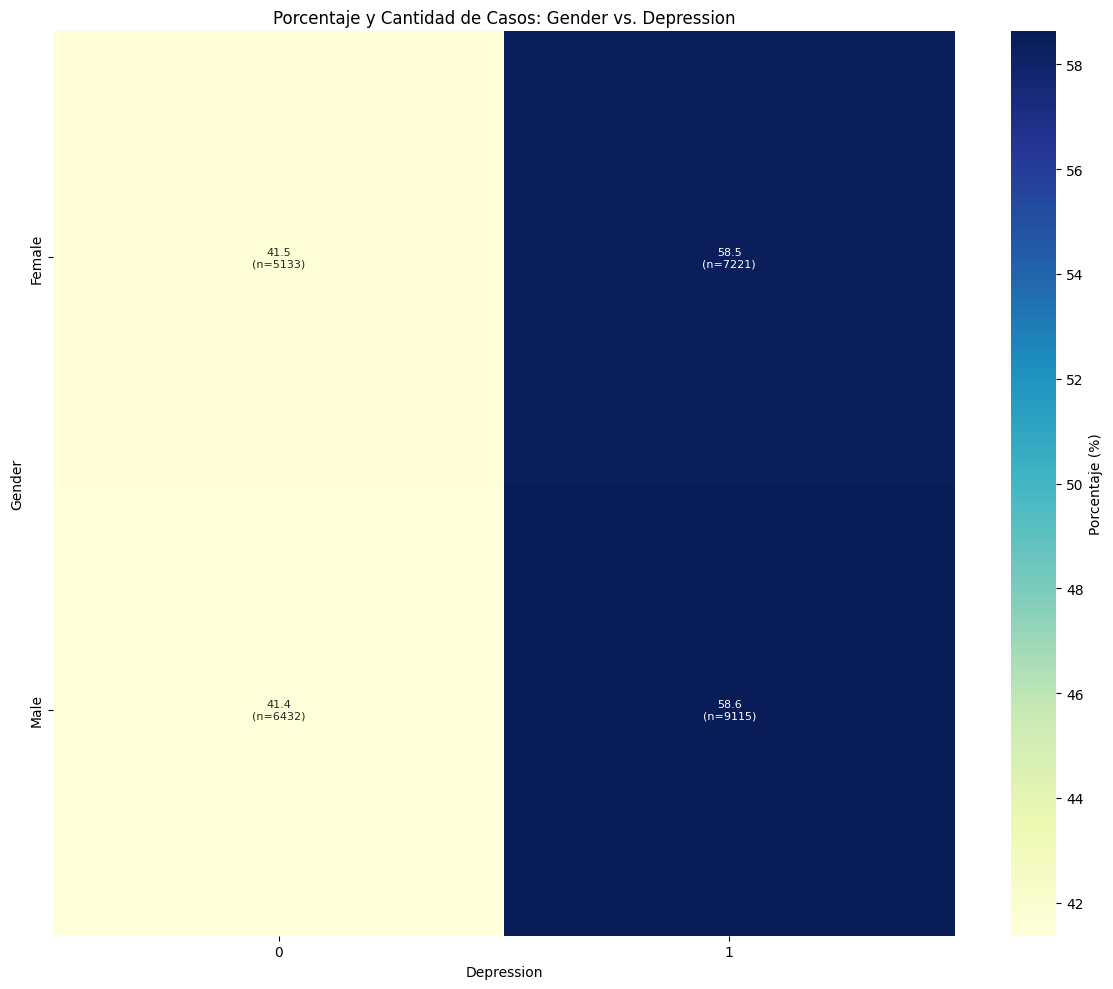

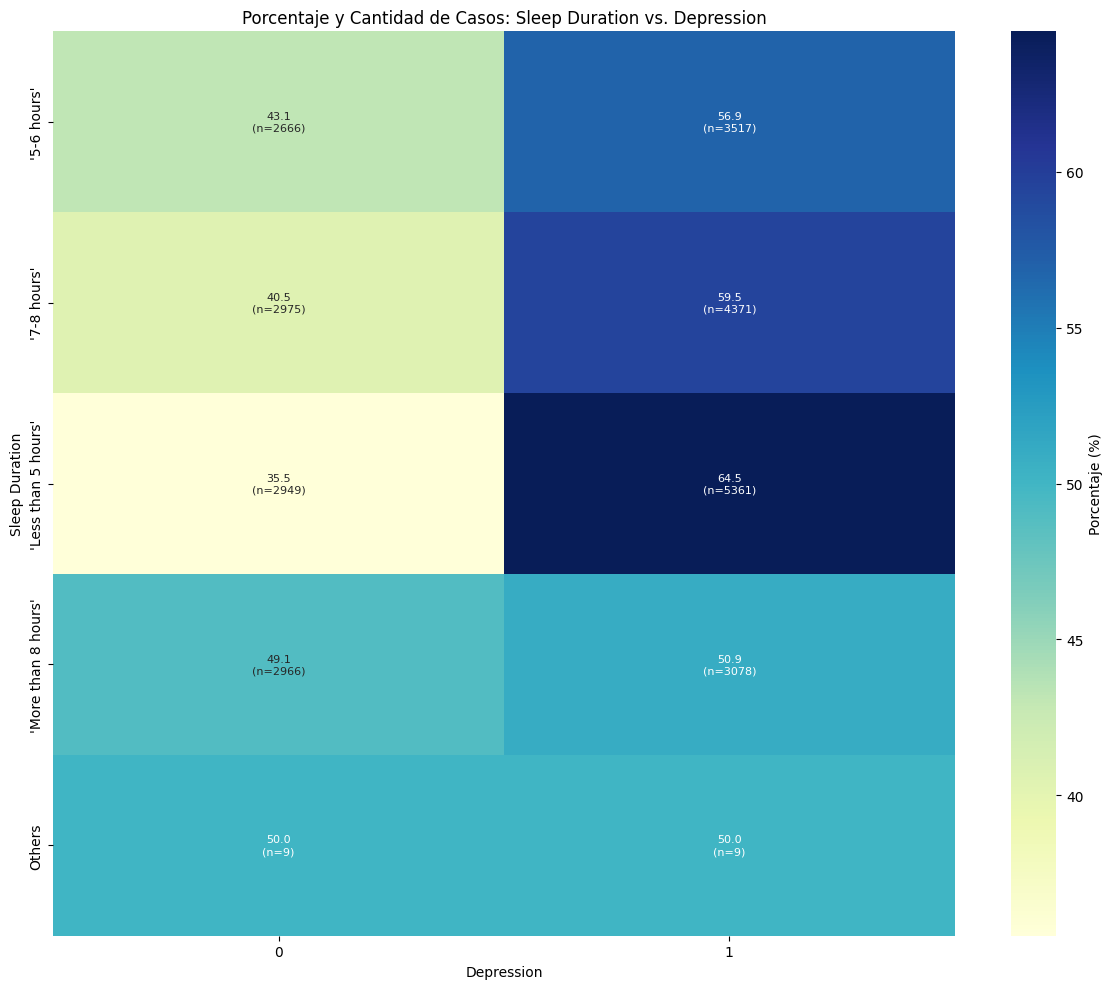

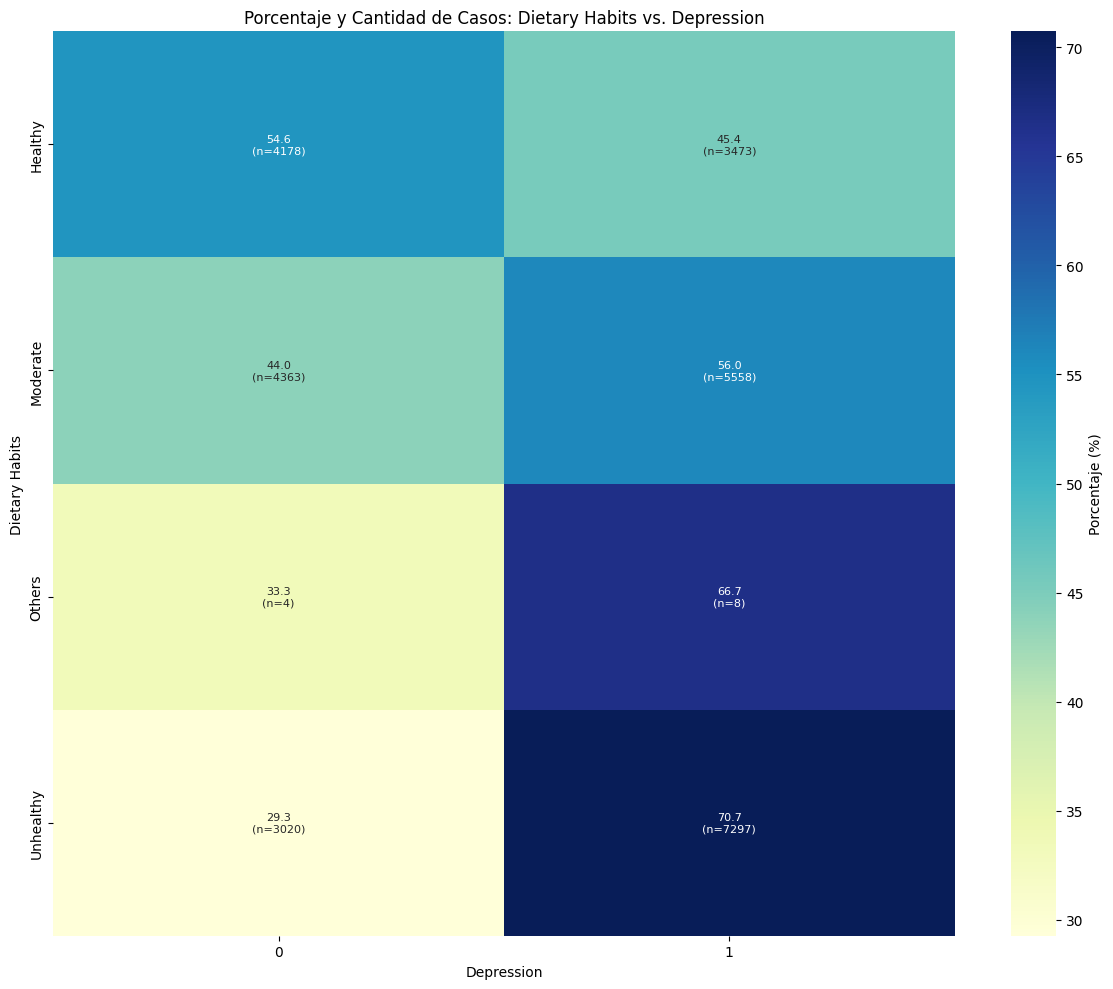

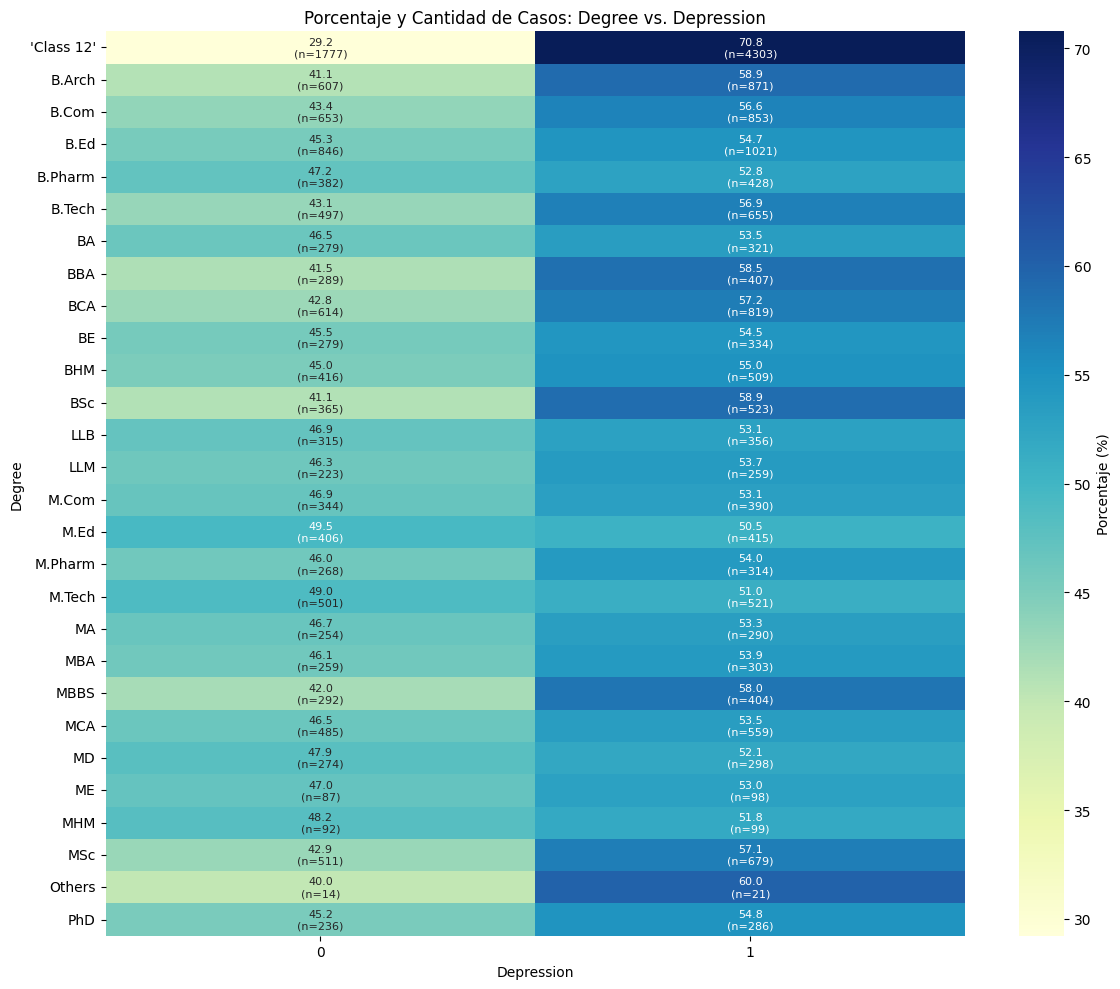

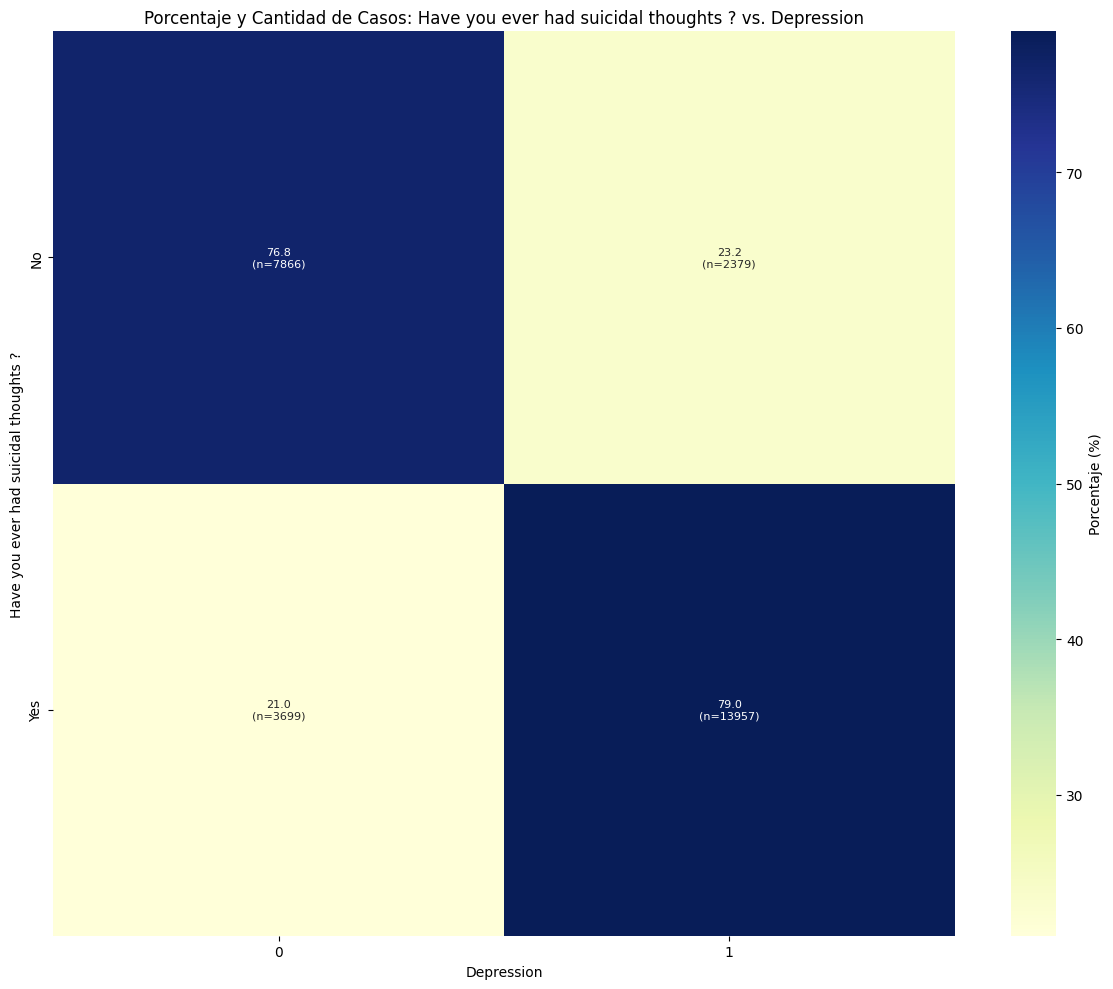

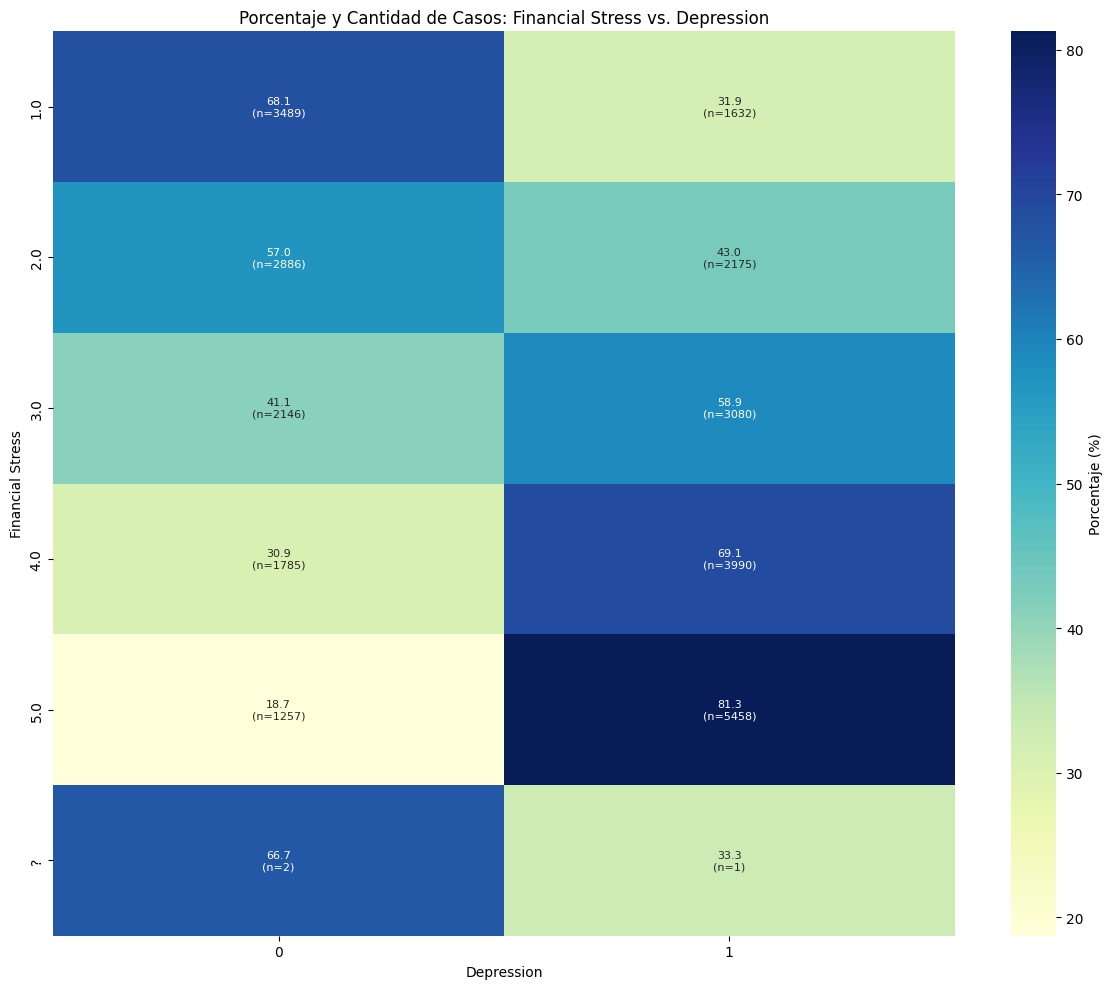

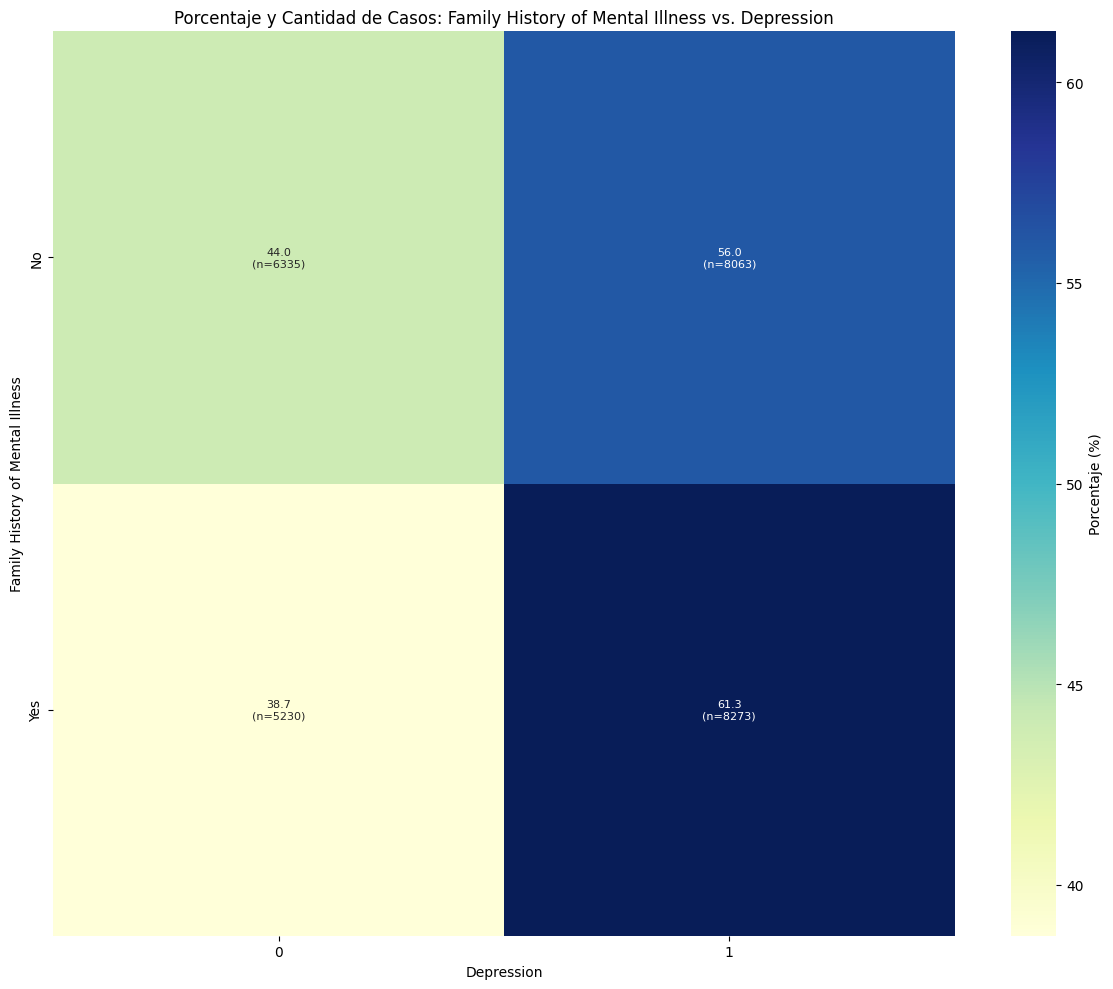

In [21]:


def heatmap_categorical_vs_categorical_both_fixed(df, cat_var1, cat_var2, normalize='index'):
    """
    Genera un heatmap de la tabla de contingencia mostrando tanto la cantidad de casos
    como el porcentaje (versión corregida para error de índice).
    normalize: 'index' para porcentajes por fila, 'columns' por columna, or 'all'.
    """
    contingency_table = pd.crosstab(df[cat_var1], df[cat_var2])
    proportion_table = pd.crosstab(df[cat_var1], df[cat_var2], normalize=normalize) * 100

    plt.figure(figsize=(12, 10))
    ax = sns.heatmap(proportion_table, annot=True, cmap='YlGnBu', fmt='.1f', cbar_kws={'label': 'Porcentaje (%)'})

    for text in ax.texts:
        row_index = int(text.get_position()[1])
        col_index = int(text.get_position()[0])

        row_val = proportion_table.index[row_index]
        col_val = proportion_table.columns[col_index]

        count = contingency_table.loc[row_val, col_val]

        text.set_text(f"{text.get_text()}\n(n={count})")
        text.set_fontsize(8)

    plt.title(f'Porcentaje y Cantidad de Casos: {cat_var1} vs. {cat_var2}')
    plt.ylabel(cat_var1)
    plt.xlabel(cat_var2)
    plt.tight_layout()
    plt.show()

# Ejemplo de uso (CORRIGE LA LISTA 'categorical_columns' SEGÚN TUS NOMBRES DE COLUMNA REALES)
categorical_columns = ['Gender', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Financial Stress', 'Family History of Mental Illness','City', 'Profession']
columns_to_exclude = ['City', 'Profession']

for cat_col in categorical_columns:
    if cat_col not in columns_to_exclude:
        heatmap_categorical_vs_categorical_both_fixed(df, cat_col, 'Depression', normalize='index')

In [22]:
import warnings
warnings.filterwarnings('ignore')
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
drop_columns = ['id', 'Gender','City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?','Financial Stress', 'Family History of Mental Illness','Depression_Binary']
df_clean = df[[c for c in df.columns if c not in drop_columns]]
[c for c in df.columns if c not in drop_columns]
X = df_clean.drop('Depression', axis=1)
y = df['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=df_clean['Depression'], random_state=42)



# Imprimir las formas de los conjuntos resultantes
print("X shape: {}".format(X.shape))
print("---> X_train shape: {}".format(X_train.shape))
print("---> X_test shape: {}".format(X_test.shape))
print('')
print("y shape: {}".format(y.shape))
print("---> y_train shape: {}".format(y_train.shape))
print("---> y_test shape: {}".format(y_test.shape))


X shape: (27901, 7)
---> X_train shape: (20925, 7)
---> X_test shape: (6976, 7)

y shape: (27901,)
---> y_train shape: (20925,)
---> y_test shape: (6976,)


In [24]:
%%time
logreg = LogisticRegression().fit(X_train, y_train)

CPU times: user 98 ms, sys: 895 µs, total: 98.9 ms
Wall time: 120 ms


In [25]:
logreg.coef_

array([[-0.10748925,  0.83516296, -0.00576586,  0.05039716, -0.23305234,
         0.0024291 ,  0.1176679 ]])

In [26]:
print("Training set score: {:.5f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.5f}".format(logreg.score(X_test, y_test)))

Training set score: 0.75747
Test set score: 0.75444


In [27]:
def get_metrics(clf, y_true, y_pred, title):
  acc_score = accuracy_score(y_true, y_pred)
  conf_mat = confusion_matrix(y_true, y_pred)
  class_report = classification_report(y_true, y_pred)
  print(f"=======Metrics for {title}=======\n")
  print(f"Classifier name : {clf.__class__.__name__}")
  print(f"Accuracy score : {acc_score}")
  print(f"Confusion maxtrix : \n{conf_mat}")
  print(f"Classification report :\n{class_report}")
  print("="*55)


In [28]:
get_metrics(logreg, y_train, logreg.predict(X_train), 'TRAIN')

=======Metrics for TRAIN=======

Classifier name : LogisticRegression
Accuracy score : 0.7574671445639187
Confusion maxtrix : 
[[ 5804  2869]
 [ 2206 10046]]
Classification report :
              precision    recall  f1-score   support

           0       0.72      0.67      0.70      8673
           1       0.78      0.82      0.80     12252

    accuracy                           0.76     20925
   macro avg       0.75      0.74      0.75     20925
weighted avg       0.76      0.76      0.76     20925



In [29]:
get_metrics(logreg, y_test, logreg.predict(X_test), 'TEST')

=======Metrics for TEST=======

Classifier name : LogisticRegression
Accuracy score : 0.7544438073394495
Confusion maxtrix : 
[[1921  971]
 [ 742 3342]]
Classification report :
              precision    recall  f1-score   support

           0       0.72      0.66      0.69      2892
           1       0.77      0.82      0.80      4084

    accuracy                           0.75      6976
   macro avg       0.75      0.74      0.74      6976
weighted avg       0.75      0.75      0.75      6976




--- Modelo de Regresión Logística ---
Accuracy en el conjunto de prueba: 0.7544

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.66      0.69      2892
           1       0.77      0.82      0.80      4084

    accuracy                           0.75      6976
   macro avg       0.75      0.74      0.74      6976
weighted avg       0.75      0.75      0.75      6976


Confusion Matrix:


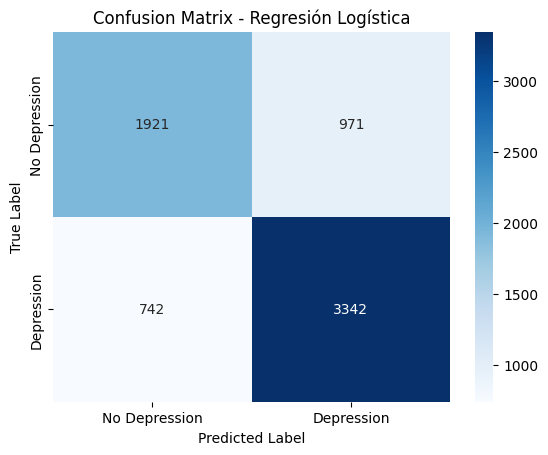


Coeficientes del modelo de Regresión Logística:
[[-0.10745913  0.8352046  -0.00583004  0.05049446 -0.23299764  0.00245687
   0.11767848]]

Intercepto del modelo de Regresión Logística:
[0.09328382]


In [30]:
# --- Modelo de Regresión Logística ---
print("\n--- Modelo de Regresión Logística ---")

# Inicializar y entrenar el modelo
logreg = LogisticRegression(random_state=42, solver='liblinear')
logreg.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_logistic = logreg.predict(X_test)

# Evaluar el modelo
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Accuracy en el conjunto de prueba: {accuracy_logistic:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_logistic))

print("\nConfusion Matrix:")
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Regresión Logística')
plt.show()

print("\nCoeficientes del modelo de Regresión Logística:")
print(logreg.coef_)
print("\nIntercepto del modelo de Regresión Logística:")
print(logreg.intercept_)


--- Modelo de Naive Bayes (GaussianNB) ---
Accuracy en el conjunto de prueba: 0.5854

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.00      0.00      2892
           1       0.59      1.00      0.74      4084

    accuracy                           0.59      6976
   macro avg       0.54      0.50      0.37      6976
weighted avg       0.55      0.59      0.43      6976


Confusion Matrix:


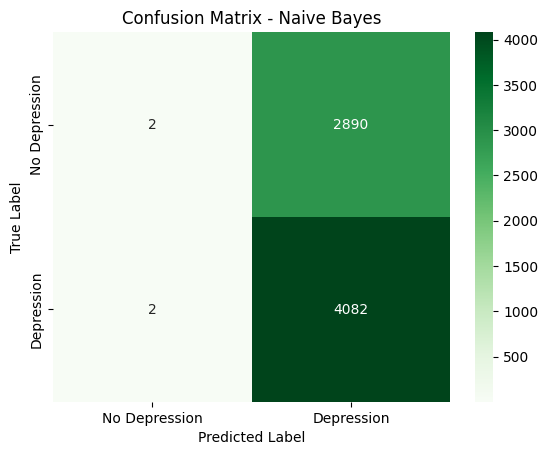

In [31]:
# --- Modelo de Naive Bayes (GaussianNB) ---
print("\n--- Modelo de Naive Bayes (GaussianNB) ---")

# Inicializar y entrenar el modelo
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_nb = naive_bayes.predict(X_test)

# Evaluar el modelo
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy en el conjunto de prueba: {accuracy_nb:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

print("\nConfusion Matrix:")
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


--- Modelo de Árbol de Decisión ---
Accuracy en el conjunto de prueba: 0.6600

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.60      0.59      2892
           1       0.71      0.70      0.71      4084

    accuracy                           0.66      6976
   macro avg       0.65      0.65      0.65      6976
weighted avg       0.66      0.66      0.66      6976


Confusion Matrix:


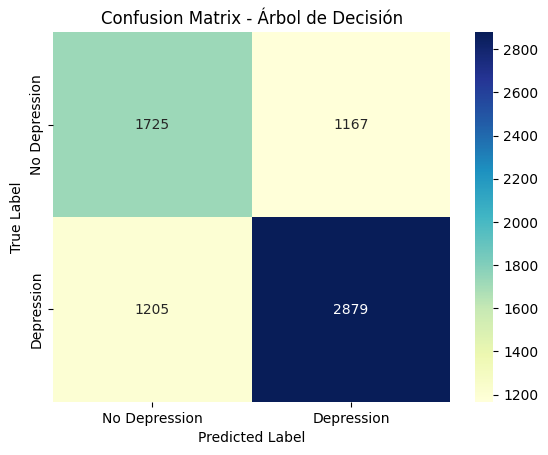

In [32]:
# --- Modelo de Árbol de Decisión ---
print("\n--- Modelo de Árbol de Decisión ---")

# Inicializar y entrenar el modelo
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_dt = decision_tree.predict(X_test)

# Evaluar el modelo
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy en el conjunto de prueba: {accuracy_dt:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

print("\nConfusion Matrix:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Árbol de Decisión')
plt.show()





--- Modelo de Random Forest ---
Accuracy en el conjunto de prueba: 0.7170

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.65      0.65      2892
           1       0.75      0.77      0.76      4084

    accuracy                           0.72      6976
   macro avg       0.71      0.71      0.71      6976
weighted avg       0.72      0.72      0.72      6976


Confusion Matrix:


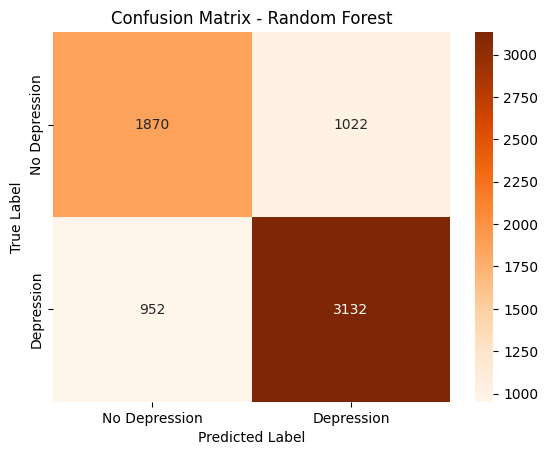

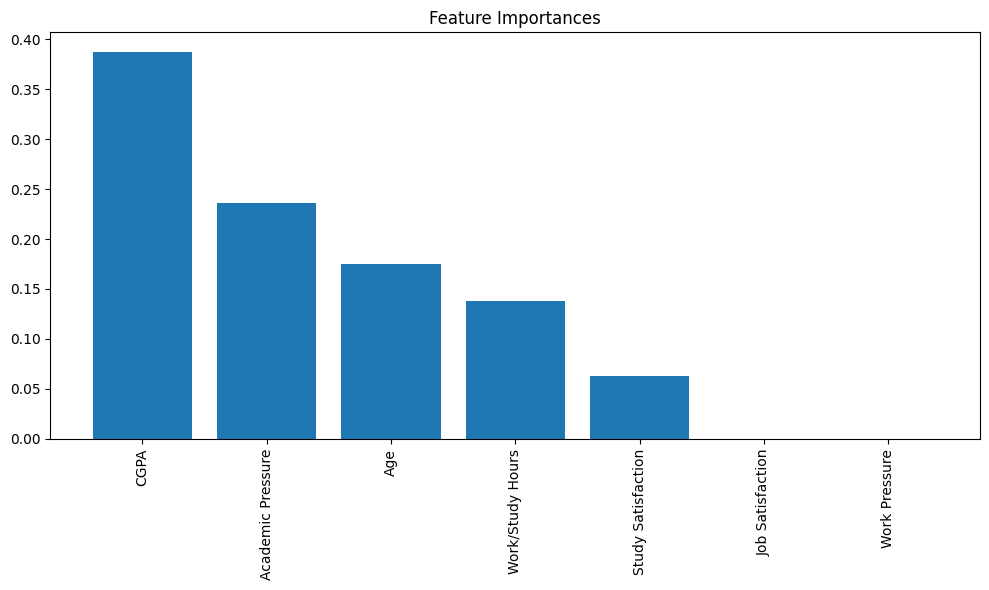

In [33]:
# --- Modelo de Random Forest ---
print("\n--- Modelo de Random Forest ---")

# Inicializar y entrenar el modelo
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_rf = random_forest.predict(X_test)

# Evaluar el modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy en el conjunto de prueba: {accuracy_rf:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Opcional: Visualizar la importancia de las características
feature_importances = random_forest.feature_importances_
feature_names = X_train.columns
sorted_indices = feature_importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()